# Python code for Churn Reduction

In [ ]:
# Load libraries
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [2]:
#Setting path
os.chdir("E:/1ST SEM/eng/edwisor_assignments/8.project 2")


# Loading data

In [3]:
#loading train and test data
df_train = pd.read_csv("Train_data.csv")
df_test = pd.read_csv("Test_data.csv")

In [4]:
cnames = ["account length","area code","number vmail messages","total day minutes","total day calls","total day charge",
"total eve minutes","total eve calls","total eve charge","total night minutes","total night calls",
"total night charge","total intl minutes","total intl calls", "total intl charge",
"number customer service calls"]


# Outlier Analysis

In [5]:
d1=df_train[cnames]
d2=df_test[cnames]

In [6]:
for i in cnames:
    #Detect and replace with NA
    #Extract quartiles
    q75, q25 = np.percentile(d1.loc[:,i], [75 ,25])

    #Calculate IQR
    iqr = q75 - q25

    #Calculate inner and outer fence
    mini = q25 - (iqr*1.5)
    maxi = q75 + (iqr*1.5)

    #Replace with NA
    d1.loc[d1.loc[:,i] < mini,:i] = np.nan
    d1.loc[d1.loc[:,i] > maxi,:i] = np.nan
    # df_train["state"]=NULL
    #impute with median
    #d1[:,i]=d1[:,i].fillna(d1[:,i].median())

C:\Users\HP\it\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\HP\it\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\HP\it\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [7]:
for i in cnames:
    #Detect and replace with NA
    #Extract quartiles
    q75, q25 = np.percentile(d2.loc[:,i], [75 ,25])

    #Calculate IQR
    iqr = q75 - q25

    #Calculate inner and outer fence
    mini = q25 - (iqr*1.5)
    maxi = q75 + (iqr*1.5)

    #Replace with NA
    d2.loc[d2.loc[:,i] < mini,:i] = np.nan
    d2.loc[d2.loc[:,i] > maxi,:i] = np.nan
    # df_train["state"]=NULL
    #impute with median
    #d1[:,i]=d1[:,i].fillna(d1[:,i].median())

C:\Users\HP\it\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\HP\it\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\HP\it\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### MIssing value imputation after outlier analysis

In [8]:
d1=d1.apply(lambda x:x.fillna(x.median()),axis=0)
d2=d2.apply(lambda x:x.fillna(x.median()),axis=0)

In [9]:
d1["international plan"]=df_train["international plan"]
d1["voice mail plan"]=df_train["voice mail plan"]
d1["churn"]=df_train["Churn"]

d2["international plan"]=df_test["international plan"]
d2["voice mail plan"]=df_test["voice mail plan"]
d2["churn"]=df_test["Churn"]

In [10]:
#assigning levels to categorical varibales
for i in range(0, d1.shape[1]):
    if(d1.iloc[:,i].dtypes == 'object'):
        d1.iloc[:,i] = pd.Categorical(d1.iloc[:,i])
        d1.iloc[:,i] = d1.iloc[:,i].cat.codes

for i in range(0, d2.shape[1]):
    if(d2.iloc[:,i].dtypes == 'object'):
        d2.iloc[:,i] = pd.Categorical(d2.iloc[:,i])
        d2.iloc[:,i] = d2.iloc[:,i].cat.codes

d2.head(10)

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,international plan,voice mail plan,churn
0,99.0,415.0,0.0,70.9,123.0,12.050,211.9,73.0,18.01,236.0,73.0,10.62,10.6,3.0,2.86,3.0,0,0,0
1,99.0,415.0,0.0,223.6,86.0,38.010,244.8,139.0,20.81,94.2,81.0,4.24,9.5,7.0,2.57,0.0,0,0,0
2,99.0,415.0,0.0,294.7,95.0,50.100,237.3,105.0,20.17,300.3,127.0,13.51,13.7,6.0,3.70,1.0,0,1,0
3,99.0,415.0,0.0,216.8,123.0,36.860,126.4,88.0,10.74,220.6,82.0,9.93,15.7,2.0,4.24,1.0,0,0,0
4,108.0,415.0,0.0,197.4,78.0,33.560,124.0,101.0,10.54,204.5,107.0,9.20,7.7,4.0,2.08,2.0,0,0,0
5,117.0,415.0,0.0,226.5,85.0,38.510,141.6,68.0,12.04,223.0,90.0,10.04,6.9,5.0,1.86,1.0,0,0,0
6,99.0,415.0,0.0,218.9,124.0,37.210,214.3,125.0,18.22,260.3,120.0,11.71,12.9,3.0,3.48,1.0,0,1,0
7,94.0,408.0,0.0,157.5,97.0,26.780,224.5,112.0,19.08,310.8,106.0,13.99,11.1,6.0,3.00,0.0,0,0,0
8,99.0,415.0,0.0,179.8,99.0,30.575,200.4,101.0,10.78,190.5,71.0,8.57,9.9,4.0,2.67,2.0,0,0,0
9,99.0,415.0,0.0,177.8,100.0,30.230,147.3,89.0,12.52,194.2,92.0,8.74,11.9,1.0,3.21,0.0,0,1,0


In [11]:
#storing target variable
train_targets = d1.churn
test_targets = d2.churn


In [12]:
#combining train and test data for data prepocessing
combined = d1.append(d2)

print(combined.shape, d1.shape, d2.shape)


(5000, 19) (3333, 19) (1667, 19)


In [13]:
combined.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,international plan,voice mail plan,churn
0,128.0,415.0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,0,1,0
1,107.0,415.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0,1,0
2,137.0,415.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0,0,0
3,100.0,415.0,0.0,179.6,101.0,30.56,201.0,100.0,17.09,196.9,89.0,8.86,6.6,7.0,1.78,2.0,1,0,0
4,75.0,415.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,1,0,0


## correlation plot

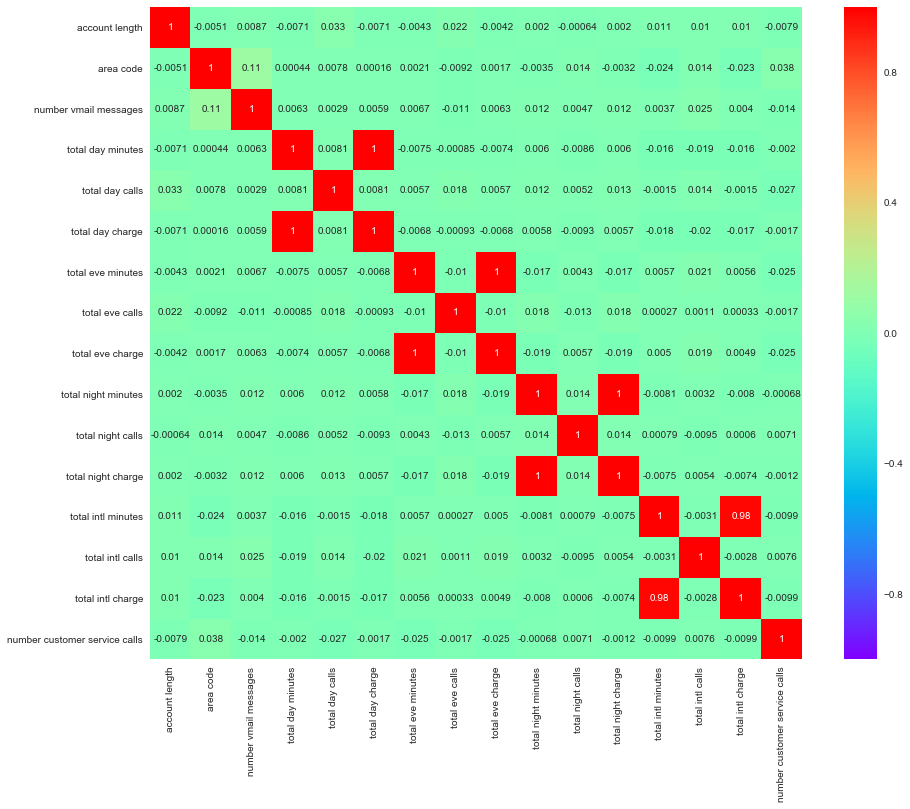

In [14]:
df_corr = combined.loc[:,cnames]
%matplotlib inline
#correlation analysis
#set height and width of plot
f , ax = plt.subplots(figsize = (15,12))
#generate correlation matrix
corr = df_corr.corr()
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='rainbow',annot=True,
            square=True, ax=ax)


In [15]:
cat_names = ["international plan","voice mail plan"]

#chi square test of independence
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(combined["churn"],combined[i]))
    print(p)


international plan
1.9443947474998577e-74
voice mail plan
7.164501780988496e-15


In [16]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 1666
Data columns (total 19 columns):
account length                   5000 non-null float64
area code                        5000 non-null float64
number vmail messages            5000 non-null float64
total day minutes                5000 non-null float64
total day calls                  5000 non-null float64
total day charge                 5000 non-null float64
total eve minutes                5000 non-null float64
total eve calls                  5000 non-null float64
total eve charge                 5000 non-null float64
total night minutes              5000 non-null float64
total night calls                5000 non-null float64
total night charge               5000 non-null float64
total intl minutes               5000 non-null float64
total intl calls                 5000 non-null float64
total intl charge                5000 non-null float64
number customer service calls    5000 non-null float64
international

## Dimensionality Reduction

In [17]:
#dropping unnecessary variables
combined = combined.drop(["total day minutes", "total eve minutes", "total night minutes", "total intl minutes"], axis = 1)

combined.shape


(5000, 15)

In [18]:
cnames = ["account length","area code","number vmail messages","total day calls","total day charge",
"total eve calls","total eve charge","total night calls","total night charge","total intl calls",
"total intl charge", "number customer service calls"]


## Normalization

In [19]:
#normalization
for i in cnames:
    print(i)
    combined[i] = (combined[i]-min(combined[i]))/(max(combined[i])-min(combined[i]))

combined.head(10)


account length
area code
number vmail messages
total day calls
total day charge
total eve calls
total eve charge
total night calls
total night charge
total intl calls
total intl charge
number customer service calls


,account length,area code,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,international plan,voice mail plan,churn
0,0.622549,0.068627,0.50,0.600000,0.794231,0.481132,0.487921,0.424528,0.665289,0.222222,0.478836,0.333333,0,1,0
1,0.519608,0.068627,0.52,0.723810,0.436726,0.518868,0.481018,0.537736,0.701653,0.222222,0.743386,0.333333,0,1,0
2,0.666667,0.068627,0.00,0.638095,0.719277,0.584906,0.208369,0.547170,0.360331,0.444444,0.634921,0.000000,0,0,0
3,0.485294,0.068627,0.00,0.514286,0.499492,0.490566,0.501294,0.405660,0.487603,0.666667,0.235450,0.666667,1,0,0
4,0.362745,0.068627,0.00,0.628571,0.454398,0.698113,0.308024,0.707547,0.450413,0.222222,0.486772,1.000000,1,0,0
5,0.573529,1.000000,0.00,0.485714,0.650213,0.500000,0.572908,0.679245,0.514050,0.555556,0.214286,0.000000,1,0,0
6,0.485294,0.068627,0.00,0.514286,0.499492,0.490566,0.501294,0.679245,0.546281,0.666667,0.301587,1.000000,0,1,0
7,0.715686,0.068627,0.00,0.304762,0.420882,0.433962,0.141933,0.471698,0.542975,0.555556,0.272487,0.000000,1,0,0
8,0.485294,0.068627,0.00,0.514286,0.499492,0.490566,0.501294,0.415094,0.557851,0.333333,0.386243,0.333333,0,0,0
9,0.686275,0.068627,0.74,0.352381,0.771684,0.594340,0.578085,0.481132,0.969421,0.444444,0.563492,0.000000,1,1,0


In [20]:
#loading libraries for model
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
#splitting combined data to train and test
train = combined[:3333]

test = combined[3333:]

C:\Users\HP\it\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
features=["account length","area code","number vmail messages","total day calls","total day charge",
"total eve calls","total eve charge","total night calls","total night charge","total intl calls", "total intl charge",
"number customer service calls","international plan","voice mail plan"]


In [22]:
X=combined[features]

In [23]:
y=combined.churn

## Decision Tree model

In [24]:
#decision tree model
c50_model = tree.DecisionTreeClassifier(criterion = 'entropy').fit(train, train_targets)
c50_pred = c50_model.predict(test)

c50_pred

#dot file to look at decision tree
dotfile = open("pt.dot", 'w')
df = tree.export_graphviz(c50_model, out_file=dotfile, feature_names = train.columns)

#testing accuracy of model
from sklearn.metrics import confusion_matrix
CM = pd.crosstab(test_targets, c50_pred)
CM

TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
accuracy_score(test_targets,c50_pred)*100
#accuracy = 92.32153
#(FN*100)/(FN+TP)
#FNR = 32.142857
#(TP*100)/(TP+FN)
#Recall = 67.8571428

100.0

## Cross Validation

In [25]:
# 10-fold cross-validation with logistic regression
print(cross_val_score(c50_model, X, y, cv=10, scoring='accuracy').mean())

0.8862005088020352


In [26]:
accuracy_score(test_targets,c50_pred)*100

100.0

In [27]:
from sklearn.model_selection import cross_val_score

## Random Forest model

In [28]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 100).fit(train,train_targets)
RF_prediction = RF_model.predict(test)


RF_prediction

CM = pd.crosstab(test_targets, RF_prediction)
CM

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
#check accuracy of model
accuracy_score(test_targets, RF_prediction)*100
#((TP+TN)*100)/(TP+TN+FP+FN)
#accuracy = 94.96100
#(FN*100)/(FN+TP)
#FNR = 33.928571



100.0

In [29]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
scores = cross_val_score(RF_model, X, y, cv=10, scoring='accuracy')
print(scores)

[0.90219561 0.90818363 0.89620758 0.934      0.924      0.924
 0.912      0.89779559 0.9238477  0.93186373]


## KNN Model

In [ ]:
#KNN implementation
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 9).fit(train, train_targets)

#predict test cases
KNN_Predictions = KNN_model.predict(test)

#build confusion matrix
CM = pd.crosstab(test_targets, KNN_Predictions)
CM

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)
#accuracy = 86.622675
#False Negative rate
#(FN*100)/(FN+TP)
#FNR =97.321428




In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
scores = cross_val_score(KNN_model, X, y, cv=10, scoring='accuracy')
print(scores)

[0.86626747 0.86626747 0.85828343 0.862      0.876      0.878
 0.86       0.85370741 0.86172345 0.86973948]


## Naive Bayes

In [33]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Naive Bayes implementation
NB_model = GaussianNB().fit(train, train_targets)

#predict test cases
NB_Predictions = NB_model.predict(test)

#Build confusion matrix
CM = pd.crosstab(test_targets, NB_Predictions)
CM

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
#check accuracy of model
#accuracy_score(Y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)
#Accuracy = 85.842831433
#False Negative rate
#(FN*100)/(FN+TP)
#FNR = 60.2678571

#we will be fixing random forest model as it provides best results
#now we will generate example out for out sample input test data with Random forest predictions
move = pd.DataFrame(RF_prediction)
move = move.rename(columns = {0:'move'})

test = test.join(move['move'])

test.to_csv("example_output.csv", index = False)

In [ ]:
 # 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
scores = cross_val_score(NB_model, X, y, cv=10, scoring='accuracy')
print(scores)